In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
data = pd.read_csv('StudPerf.csv', sep=",")

In [3]:
data.shape

(1000, 8)

In [4]:
data.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                       int64
reading score                    int64
writing score                  float64
dtype: object

In [5]:
data.isnull().sum()

gender                          0
race/ethnicity                  7
parental level of education     0
lunch                           0
test preparation course         0
math score                      0
reading score                   0
writing score                  17
dtype: int64

In [6]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74.0
1,female,group C,some college,standard,completed,69,90,88.0
2,female,group B,master's degree,standard,none,90,95,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44.0
4,male,group C,some college,standard,none,76,78,75.0


In [8]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 1000


In [9]:
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка writing score. Тип данных float64. Количество пустых значений 17, 1.7%.


In [10]:
data_num = data[num_cols]
data_num

,writing score
0,74.0
1,88.0
2,93.0
3,44.0
4,75.0
...,...
995,95.0
996,NaN
997,65.0
998,77.0


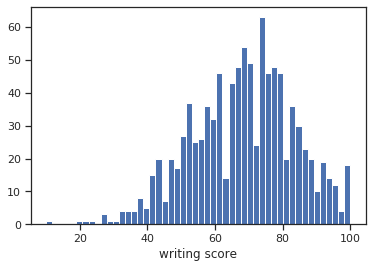

In [11]:
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [13]:
data_num_writing_score = data_num[['writing score']]
data_num_writing_score.head()

,writing score
0,74.0
1,88.0
2,93.0
3,44.0
4,75.0


In [14]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [15]:
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_writing_score)
mask_missing_values_only

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [17]:
strategies=['mean', 'median', 'most_frequent']

In [18]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_writing_score)
    return data_num_imp[mask_missing_values_only]

In [19]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([68.11088505, 68.11088505, 68.11088505, 68.11088505, 68.11088505,
        68.11088505, 68.11088505, 68.11088505, 68.11088505, 68.11088505,
        68.11088505, 68.11088505, 68.11088505, 68.11088505, 68.11088505,
        68.11088505, 68.11088505]))

In [20]:
strategies[1], test_num_impute(strategies[1])

('median',
 array([69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69.,
        69., 69., 69., 69.]))

In [24]:
strategies[2], test_num_impute(strategies[2])

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/impute/_base.py:356: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  row_mask = np.logical_not(row_mask).astype(np.bool)


('most_frequent',
 array([74., 74., 74., 74., 74., 74., 74., 74., 74., 74., 74., 74., 74.,
        74., 74., 74., 74.]))

In [25]:
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [27]:
data[['test_num_impute_col(data, 'writing score', strategies[0])']].describe()

,writing score
count,983.000000
mean,68.110885
std,15.180010
min,10.000000
25%,57.000000
50%,69.000000
75%,79.000000
max,100.000000


In [28]:
test_num_impute_col(data, 'writing score', strategies[0])

('writing score', 'mean', 17, 68.11088504577823, 68.11088504577823)

In [29]:
test_num_impute_col(data, 'writing score', strategies[1])

('writing score', 'median', 17, 69.0, 69.0)

In [30]:
test_num_impute_col(data, 'writing score', strategies[2])

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/impute/_base.py:356: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  row_mask = np.logical_not(row_mask).astype(np.bool)


('writing score', 'most_frequent', 17, 74.0, 74.0)

In [31]:
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка race/ethnicity. Тип данных object. Количество пустых значений 7, 0.7%.


In [32]:
cat_temp_data = data[['race/ethnicity']]
cat_temp_data.head()

,race/ethnicity
0,group B
1,group C
2,group B
3,group A
4,group C


In [33]:
cat_temp_data['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', nan, 'group D', 'group E'],
      dtype=object)

In [35]:
cat_temp_data[cat_temp_data['race/ethnicity'].isnull()].shape

(7, 1)

In [36]:
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/impute/_base.py:356: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  row_mask = np.logical_not(row_mask).astype(np.bool)


array([['group B'],
       ['group C'],
       ['group B'],
       ['group A'],
       ['group C'],
       ['group C'],
       ['group B'],
       ['group B'],
       ['group D'],
       ['group B'],
       ['group C'],
       ['group D'],
       ['group B'],
       ['group A'],
       ['group A'],
       ['group C'],
       ['group C'],
       ['group B'],
       ['group C'],
       ['group C'],
       ['group D'],
       ['group B'],
       ['group D'],
       ['group C'],
       ['group D'],
       ['group A'],
       ['group B'],
       ['group C'],
       ['group C'],
       ['group D'],
       ['group D'],
       ['group B'],
       ['group E'],
       ['group D'],
       ['group E'],
       ['group E'],
       ['group D'],
       ['group D'],
       ['group C'],
       ['group B'],
       ['group C'],
       ['group C'],
       ['group B'],
       ['group B'],
       ['group E'],
       ['group B'],
       ['group A'],
       ['group C'],
       ['group D'],
       ['group C'],


In [37]:
np.unique(data_imp2)

array(['group A', 'group B', 'group C', 'group D', 'group E'],
      dtype=object)

In [38]:
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['group B'],
       ['group C'],
       ['group B'],
       ['group A'],
       ['group C'],
       ['NA'],
       ['group B'],
       ['group B'],
       ['group D'],
       ['group B'],
       ['group C'],
       ['group D'],
       ['group B'],
       ['group A'],
       ['group A'],
       ['group C'],
       ['group C'],
       ['group B'],
       ['group C'],
       ['group C'],
       ['group D'],
       ['group B'],
       ['group D'],
       ['group C'],
       ['group D'],
       ['group A'],
       ['group B'],
       ['group C'],
       ['group C'],
       ['group D'],
       ['group D'],
       ['group B'],
       ['group E'],
       ['group D'],
       ['group E'],
       ['group E'],
       ['group D'],
       ['group D'],
       ['NA'],
       ['group B'],
       ['group C'],
       ['group C'],
       ['group B'],
       ['group B'],
       ['group E'],
       ['group B'],
       ['group A'],
       ['group C'],
       ['group D'],
       ['group C'],
       ['g

In [39]:
np.unique(data_imp3)

array(['NA', 'group A', 'group B', 'group C', 'group D', 'group E'],
      dtype=object)

In [40]:
data_imp3[data_imp3=='NA'].size

7

In [42]:
cat_enc = pd.DataFrame({'race/ethnicity':data_imp2.T[0]})
cat_enc

,race/ethnicity
0,group B
1,group C
2,group B
3,group A
4,group C
...,...
995,group E
996,group C
997,group C
998,group D


In [43]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['race/ethnicity'])
cat_enc['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [44]:
np.unique(cat_enc_le)

array([0, 1, 2, 3, 4])

In [45]:
le.inverse_transform([0, 1, 2, 3])

array(['group A', 'group B', 'group C', 'group D'], dtype=object)

In [46]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['race/ethnicity']])
cat_enc.shape

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:395: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  check_array(X, dtype=np.int)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:110: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to re

(1000, 1)

In [47]:
cat_enc_ohe.shape

(1000, 5)

In [48]:
cat_enc_ohe

<1000x5 sparse matrix of type '<class 'numpy.float64'>'
	with 1000 stored elements in Compressed Sparse Row format>

In [49]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.]])

In [50]:
cat_enc.head(10)

,race/ethnicity
0,group B
1,group C
2,group B
3,group A
4,group C
5,group C
6,group B
7,group B
8,group D
9,group B


In [51]:
pd.get_dummies(cat_enc).head()

,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,0,1,0,0,0
1,0,0,1,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,0,0,1,0,0


In [53]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,race/ethnicity_nan
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,1,0,0,0


In [54]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

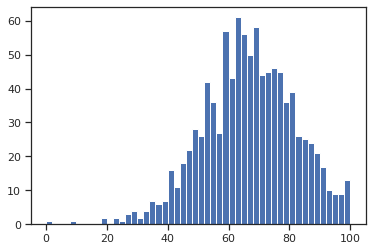

In [55]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['math score']])
plt.hist(data['math score'], 50)
plt.show()

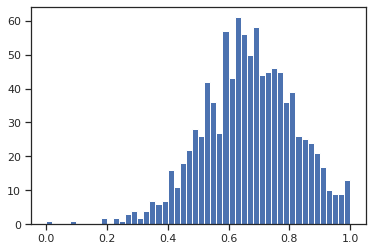

In [56]:
plt.hist(sc1_data, 50)
plt.show()

In [58]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['reading score']])

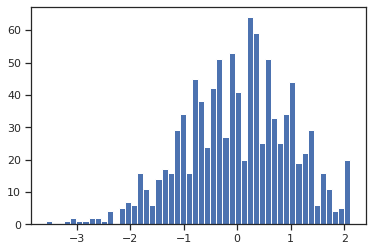

In [59]:
plt.hist(sc2_data, 50)
plt.show()